In [1]:
import pandas as pd
import numpy as np
import os


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

os.getcwd()

'/Users/murat/Library/CloudStorage/OneDrive-UniversityofRochester/UR_Projects/CampaignContribution_Winner_Kaggle'

In [2]:
train = pd.read_csv("training_data.csv")


/var/folders/nd/dj_lrx2d6j3fccjhjy5pqygc0000gn/T/ipykernel_19725/3473200358.py:1: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("training_data.csv")


In [3]:

cat_vars = ['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type']
num_vars = ['winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
       'house_and_assembly_contribution_ratio', 'politician_challenger_ratio',
       'politician_democratic_ratio', 'politician_incumbency_ratio',
       'politician_open_pos_ratio', 'politician_republican_ratio',
       'senate_contribution_ratio', 'us_house_contribution_ratio',
       'us_senate_contribution_ratio', 'contrib_state_deg',
       'contrib_state_wdeg', 'contrib_state_pr', 'contrib_state_comm',
       'contrib_fed_deg', 'contrib_fed_wdeg', 'contrib_fed_pr',
       'contrib_fed_comm', 'state_all_deg', 'state_all_wdeg', 'state_all_pr',
       'state_all_comm', 'state_win_deg', 'state_win_wdeg', 'state_win_pr',
       'state_win_comm']

In [4]:
train.columns

Index(['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type', 'winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_rat

### Data Clean up: 
Correct Types, Check/remove Missing, Check/remove Duplicates

In [5]:
#convert columns of train that are listed in numerical_variables to numeric:
for col in num_vars:
    if col in train.columns:
        train[col] = pd.to_numeric(train[col], errors='coerce')
#convert columns of train that are listed in categorical_variables to categorical:

In [5]:
# 3. Check for missing values
print('Size of the train data:',train.shape)
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values in the dataset:")
print(missing_values)

Size of the train data: (172848, 41)
Missing values in the dataset:
city                                     1468
zip_code                                 3929
governor_contribution_ratio               192
house_and_assembly_contribution_ratio     192
senate_contribution_ratio                 192
us_house_contribution_ratio               192
us_senate_contribution_ratio              192
dtype: int64


In [6]:
#Removing lines with missing values:
train.dropna(inplace=True)
# 4. Check for duplicates
duplicates = train.duplicated().sum()
print("Duplicates in the dataset:", duplicates)

#Remove duplicates
train.drop_duplicates(inplace=True)

Duplicates in the dataset: 1618


In [8]:
import pandas as pd

# Temporarily show all columns for describe output
with pd.option_context('display.max_columns', None):
    display(train.describe())

,zip_code,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,contribution_democratic_count,contribution_republican_count,politician_challenger_count,politician_count,politician_democratic_count,politician_incumbency_count,politician_open_pos_count,politician_republican_count,contribution_democratic_sum_2010_usd,contribution_republican_sum_2010_usd,contribution_sum_2010_usd,governor_contributions_sum_2010_usd,house_and_assembly_contributions_sum_2010_usd,senate_contributions_sum_2010_usd,us_house_contributions_sum_2010_usd,us_senate_contributions_sum_2010_usd,candidacy_democratic_ratio,candidacy_republican_ratio,contribution_democratic_count_ratio,contribution_republican_count_ratio,governor_contribution_ratio,house_and_assembly_contribution_ratio,politician_challenger_ratio,politician_democratic_ratio,politician_incumbency_ratio,politician_open_pos_ratio,politician_republican_ratio,senate_contribution_ratio,us_house_contribution_ratio,us_senate_contribution_ratio
count,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000
mean,39024.489699,0.594162,6.176805,3.335922,2.840883,9.895191,5.466083,4.429109,0.713137,5.125878,2.790437,2.507988,1.828703,2.335442,4.352812e+03,4.908672e+03,9.261483e+03,1.510798e+03,1.625962e+03,1.162175e+03,2.940238e+03,1.263451e+03,0.556006,0.443994,0.556252,0.443748,0.258518,0.252494,0.159855,0.556139,0.391814,0.427220,0.443861,0.161418,0.121688,0.085453
std,28760.187022,0.407922,25.969141,14.217441,15.054820,94.246271,31.486817,83.029806,2.022104,15.343861,8.552393,11.275683,4.204532,9.247521,8.405754e+04,2.668723e+05,2.839546e+05,1.192158e+05,8.482449e+04,4.544781e+04,7.107880e+04,2.871951e+04,0.467408,0.467408,0.468618,0.468618,0.404824,0.398502,0.302718,0.466829,0.406189,0.411307,0.466829,0.339712,0.435256,0.401273
min,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-3.107367e+05,-3.674252e+05,-3.674252e+05,-2.440000e+04,-1.028403e+05,-3.790261e+05,-3.107367e+05,-2.376295e+04,0.000000,0.000000,0.000000,0.000000,-23.380614,-6.118411,0.000000,0.000000,0.000000,0.000000,0.000000,-29.388715,-6.448457,-92.603744
25%,19534.750000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.208500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30523.000000,0.666667,2.000000,2.000000,1.000000,4.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.400000e+02,4.466000e+01,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.800000,0.200000,0.833333,0.166667,0.000000,0.000000,0.000000,0.800000,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000
75%,63102.000000,1.000000,4.000000,3.000000,2.000000,7.000000,4.000000,3.000000,1.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.314455e+03,1.013020e+03,2.845180e+03,3.076775e+02,2.704200e+02,1.000000e+02,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,0.520489,0.466856,0.200000,1.000000,0.785714,1.000000,1.000000,0.118383,0.000000,0.000000
max,99999.000000,1.000000,2026.000000,1284.000000,1014.000000,31652.000000,3990.000000,31648.000000,140.000000,829.000000,543.000000,608.000000,296.000000,584.000000,1.468935e+07,9.500888e+07,9.503992e+07,4.472358e+07,2.229992e+07,1.375416e+07,1.220771e+07,6.78302

In [9]:
cols_with_negatives = ['contribution_democratic_sum_2010_usd','contribution_republican_sum_2010_usd','contribution_sum_2010_usd','governor_contributions_sum_2010_usd',
'house_and_assembly_contributions_sum_2010_usd','senate_contributions_sum_2010_usd','us_house_contributions_sum_2010_usd',
'us_senate_contributions_sum_2010_usd','governor_contribution_ratio','house_and_assembly_contribution_ratio','senate_contribution_ratio',
'us_house_contribution_ratio','us_senate_contribution_ratio']

train[cols_with_negatives].describe()


,contribution_democratic_sum_2010_usd,contribution_republican_sum_2010_usd,contribution_sum_2010_usd,governor_contributions_sum_2010_usd,house_and_assembly_contributions_sum_2010_usd,senate_contributions_sum_2010_usd,us_house_contributions_sum_2010_usd,us_senate_contributions_sum_2010_usd,governor_contribution_ratio,house_and_assembly_contribution_ratio,senate_contribution_ratio,us_house_contribution_ratio,us_senate_contribution_ratio
count,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,1.664940e+05,166494.000000,166494.000000,166494.000000,166494.000000,166494.000000
mean,4.352812e+03,4.908672e+03,9.261483e+03,1.510798e+03,1.625962e+03,1.162175e+03,2.940238e+03,1.263451e+03,0.258518,0.252494,0.161418,0.121688,0.085453
std,8.405754e+04,2.668723e+05,2.839546e+05,1.192158e+05,8.482449e+04,4.544781e+04,7.107880e+04,2.871951e+04,0.404824,0.398502,0.339712,0.435256,0.401273
min,-3.107367e+05,-3.674252e+05,-3.674252e+05,-2.440000e+04,-1.028403e+05,-3.790261e+05,-3.107367e+05,-2.376295e+04,-23.380614,-6.118411,-29.388715,-6.448457,-92.603744
25%,0.000000e+00,0.000000e+00,3.208500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.400000e+02,4.466000e+01,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.314455e+03,1.013020e+03,2.845180e+03,3.076775e+02,2.704200e+02,1.000000e+02,0.000000e+00,0.000000e+00,0.520489,0.466856,0.118383,0.000000,0.000000
max,1.468935e+07,9.500888e+07,9.503992e+07,4.472358e+07,2.229992e+07,1.375416e+07,1.220771e+07,6.783020e+06,3.348887,30.388715,24.380614,93.603744,7.448457


In [10]:
# ### Treat these descrepent columns
# for col in cols_with_negatives:
#     train[col] = train[col].clip(lower=0)


### Distribution Plot:

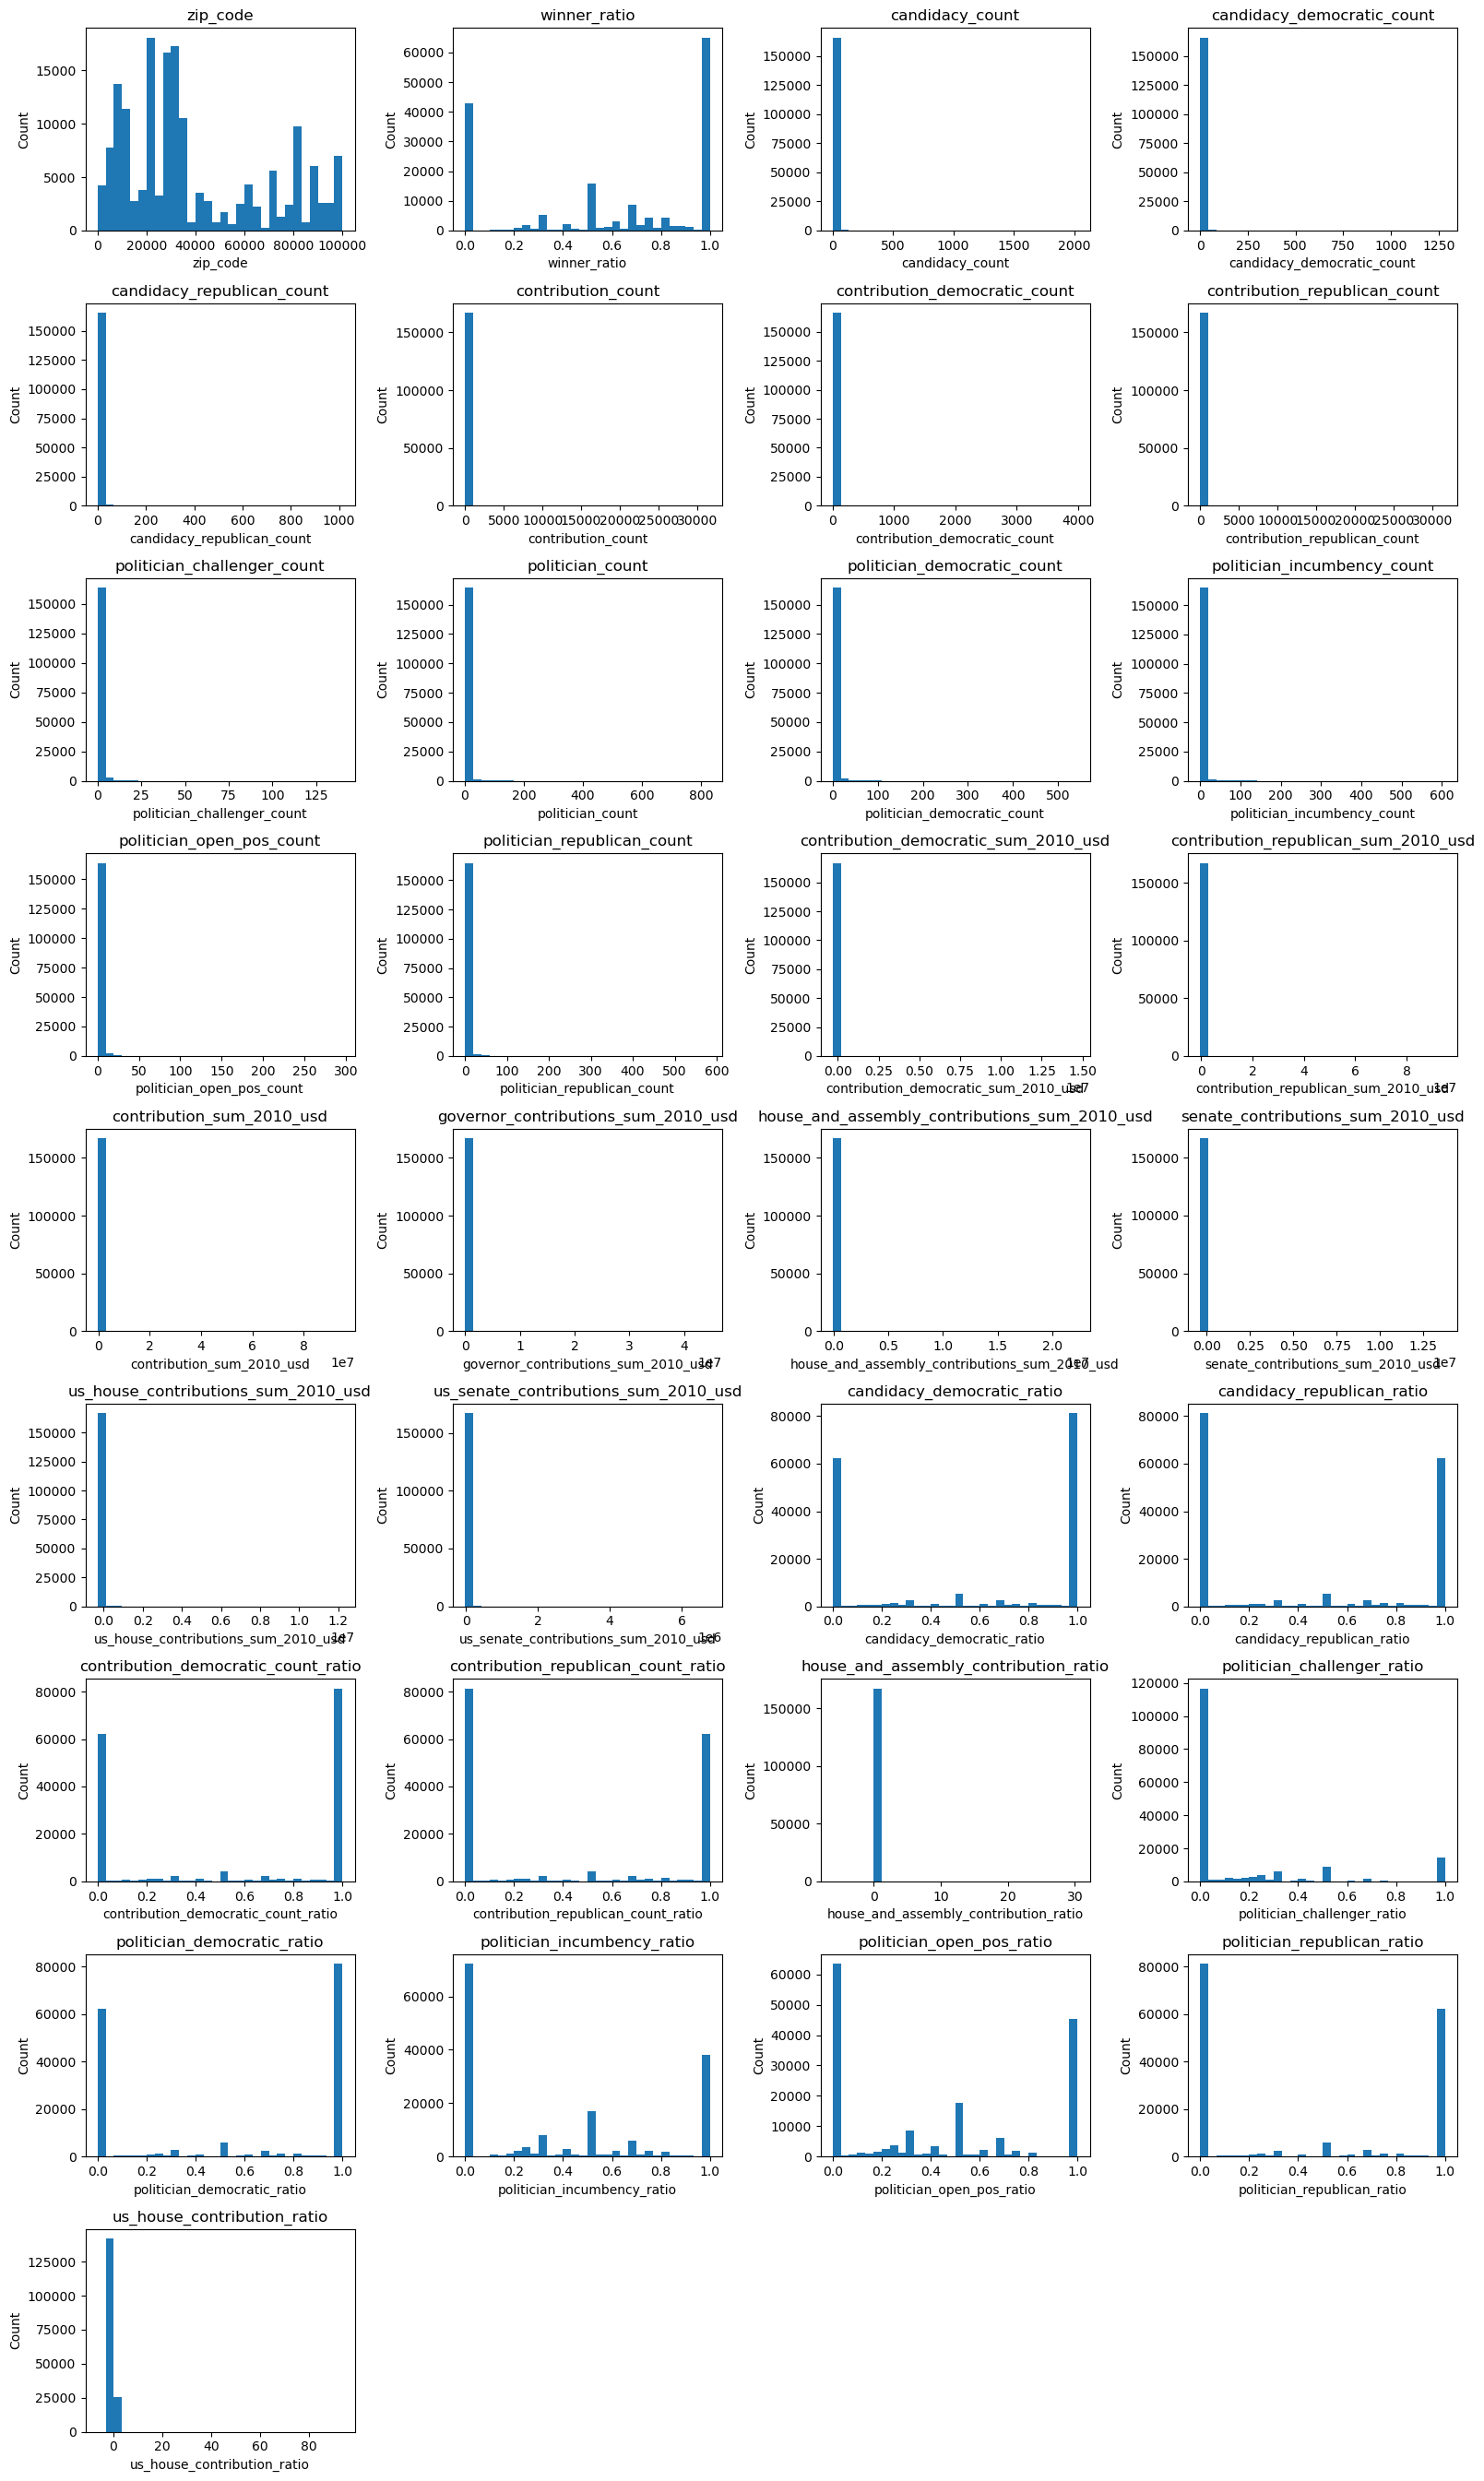

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Grab your numeric columns
numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
n = len(numeric_cols)

# 2. Choose number of columns per row
ncols = 4
nrows = int(np.ceil(n / ncols))

# 3. Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows))
axes = axes.flatten()

# 4. Loop and plot
for idx, col in enumerate(numeric_cols):
    ax = axes[idx]
    data = train[col].dropna()
    ax.hist(data, bins=30)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# 5. Remove any extra axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [8]:
train.drop(columns=['zip_code'], inplace=True)  # drop ZIP 


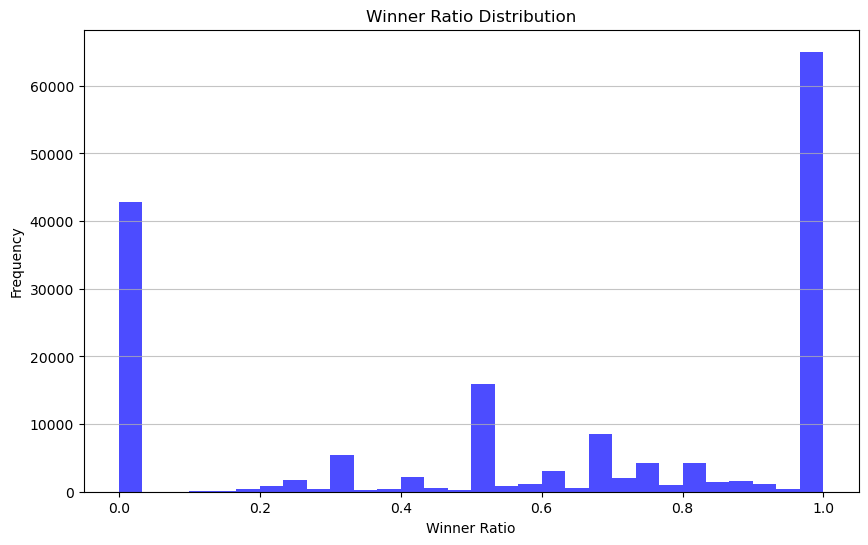

In [9]:
#Winner Ratio distribution:
plt.figure(figsize=(10, 6))
plt.hist(train['winner_ratio'], bins=30, color='blue', alpha=0.7)
plt.title('Winner Ratio Distribution')
plt.xlabel('Winner Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
# 5. Check for outliers

In [23]:
#Sorting winner_ratio unique values sorted:
train.winner_ratio.value_counts().sort_values(ascending=False).head(10)

winner_ratio
1.000000    64953
0.000000    42886
0.500000    15614
0.666667     8094
0.333333     5221
0.750000     3902
0.800000     2319
0.600000     2133
0.250000     1787
0.400000     1497
Name: count, dtype: int64

In [24]:
#summing top 5 winner_ratio values
train.winner_ratio.value_counts().sort_values(ascending=False).head(10).sum()/train.shape[0] * 100

np.float64(88.82969808700649)

In [13]:
# 2) Create the composite state_city
train['state_city'] = train['state'] + '_' + train['city']

# 3) Compute frequency encoding (proportion of rows)
freq = (
    train['state_city']
    .value_counts(normalize=True)
    .rename('state_city_freq')
)

# 4) Map it back into train
train = train.join(freq, on='state_city')

# 5)drop the raw string
train.drop(columns=['state_city'], inplace=True)

In [17]:
freq.head(10)

state_city
DC_WASHINGTON     0.018391
NM_ALBUQUERQUE    0.012073
CO_DENVER         0.010655
FL_MIAMI          0.010193
US_WASHINGTON     0.009994
US_NEW YORK       0.009334
NC_RALEIGH        0.009322
FL_TALLAHASSEE    0.008727
NY_NEW YORK       0.008192
FL_TAMPA          0.007862
Name: state_city_freq, dtype: float64

### Assigning target and other col's

In [18]:
# Create a flag column for each: 1 if negative, else 0
for c in cols_with_negatives:
    flag_col = c + '_neg_flag'
    train[flag_col] = (train[c] < 0).astype(int)

In [22]:
train.drop(columns=['city'], inplace=True)  # drop original columns

In [23]:
TARGET = 'winner_ratio'
all_features = [c for c in train.columns if c != TARGET]

#Categorical vs numeric
# Now including city as a categorical
cat_cols = ['general_sector', 'specific_sector', 'state', 'contributor_type']
num_cols = [c for c in all_features if c not in cat_cols]


In [24]:
# 4. Split numeric into skewed (>1) vs ratio (≤1)
skewed_feats = [c for c in num_cols if train[c].max() > 1]

# 1. Identify your flag columns explicitly
flag_feats = [c for c in train.columns if c.endswith('_neg_flag')]

# 2. Re‑split your numeric lists
#    skewed_feats stays the same (those >1 before)
#    ratio_feats now only holds the true [0,1] ratio features
ratio_feats = [
    c for c in num_cols 
    if (train[c].max() <= 1) and (c not in flag_feats)
]
ratio_feats = [c for c in num_cols if train[c].max() <= 1]


### Pre-Processing Pipeline

In [25]:
# 7. Build preprocessing pipelines
# 7a. Clip negatives to zero → log1p → scale
skew_pipe = Pipeline([
    ('clip0', FunctionTransformer(lambda X: np.clip(X, 0, None), validate=False)),
    ('log1p', FunctionTransformer(np.log1p,           validate=False)),
    ('scale', StandardScaler())
])

# 7b. Scale the [0,1] features (ratios + flags)
ratio_pipe = Pipeline([
    ('scale', StandardScaler())
])
# we leave flags as-is
flag_pipe = 'passthrough'      

cat_pipe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('skew',  skew_pipe,   skewed_feats),
    ('ratio', ratio_pipe,  ratio_feats),
    ('flag',  flag_pipe,   flag_feats),
    ('cats',  cat_pipe,    cat_cols)
])

### Modeling Pipeline:

In [ ]:
# model = Pipeline([
#     ('preproc', preprocessor),
#     ('xgb', XGBRegressor(
#         objective='reg:logistic',   # ← logistic loss → outputs P̂∈[0,1]
#         eval_metric='rmse',         # or 'logloss' if you want to optimize log‐loss
#         n_estimators=1000,
#         learning_rate=0.02
#     ))
# ])

# Build new model with Random Forest
from sklearn.ensemble import RandomForestRegressor
model = Pipeline([
    ('preproc', preprocessor),
    ('rf', RandomForestRegressor(
        n_estimators=500,        # you can adjust
        max_depth=15,            # you can tune
        min_samples_split=10,
        min_samples_leaf=4,
        random_state=42,
        n_jobs=-1
    ))
])


# 7. Train/validation split
X = train[all_features]
y = train[TARGET]
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)



# import numpy as np
# from sklearn.compose import TransformedTargetRegressor
# from sklearn.preprocessing import FunctionTransformer

# # ── 1) Define a “logit” transformer with a tiny ε to avoid 0/0 or 1/0 ──
# eps = 1e-6
# logit_tf = FunctionTransformer(
#     func     = lambda y:  np.log((y + eps) / (1 - y + eps)),
#     inverse_func = lambda y: 1 / (1 + np.exp(-y)),
#     validate=False
# )

# # ── 2) Wrap your pipeline in TransformedTargetRegressor ──
# ttr = TransformedTargetRegressor(
#     regressor = model,    # your Pipeline from before
#     transformer = logit_tf
#)





### Run and Evaluate Model:

In [62]:
# # ── 3) Fit on your train split ──
# ttr.fit(X_train, y_train)

# # ── 4) Predict (automatically applies inverse‐logit) ──
# y_val_pred = ttr.predict(X_val)

# # ── 5) Evaluate MSE as usual ──
# from sklearn.metrics import mean_squared_error
# print("Val MSE:", mean_squared_error(y_val, y_val_pred))

In [28]:
# 1. Fit the model
model.fit(X_train, y_train)

# X_tr = model.named_steps['preproc'].transform(X_train)

# import numpy as np
# print("Any NaNs? ", np.isnan(X_tr).any())
# print("Any Infs? ", np.isinf(X_tr).any())



Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('skew',
                                                  Pipeline(steps=[('clip0',
                                                                   FunctionTransformer(func=<function <lambda> at 0x31047ec00>)),
                                                                  ('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['candidacy_count',
                                                   'candidacy_democratic_count',
                                                   'candidacy_republican_count',
                                                   'contribution_count',
                                                   'contribution_democra...
                                                   'senate_contribution_ratio_neg_flag',
                                                   'us_house_contribution_ratio_neg_flag',
                                                   'us_senate_contribution_ratio_neg_flag']),
                                                 ('cats',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['general_sector',
                                                   'specific_sector', 'state',
                                                   'contributor_type'])])),
                ('rf',
                 RandomForestRegressor(max_depth=15, min_samples_leaf=4,
                                       min_samples_split=10, n_estimators=500,
                                       n_jobs=-1, random_state=42))])

In [29]:
# 2. Predict on TRAIN
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# 3. Predict on VAL
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)

print(f"Train MSE: {train_mse:.6f}")
print(f"Val   MSE: {val_mse:.6f}")

Train MSE: 0.070980
Val   MSE: 0.083323


### Plotting Results:

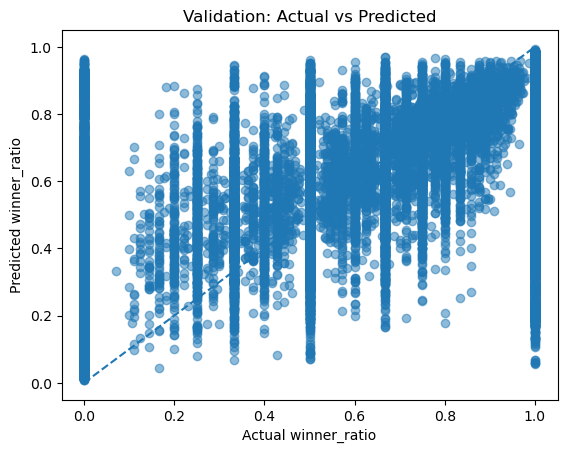

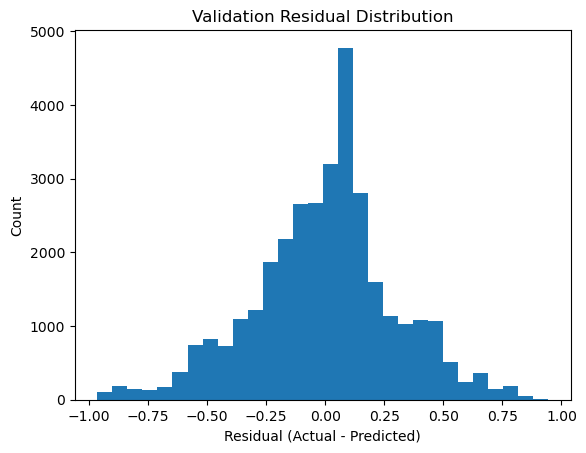

In [65]:
import matplotlib.pyplot as plt

# Assuming the model is already fitted and X_train, X_val, y_train, y_val are defined
# # Compute predictions
# y_train_pred = model.predict(X_train)
# y_val_pred = model.predict(X_val)

# 1) Scatter plot: Actual vs Predicted on Validation Set
plt.figure()
plt.scatter(y_val, y_val_pred, alpha=0.5)
min_val = min(y_val.min(), y_val_pred.min())
max_val = max(y_val.max(), y_val_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel('Actual winner_ratio')
plt.ylabel('Predicted winner_ratio')
plt.title('Validation: Actual vs Predicted')
plt.show()

# 2) Residuals distribution on Validation Set
residuals = y_val - y_val_pred
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Count')
plt.title('Validation Residual Distribution')
plt.show()


**********

In [197]:
import numpy as np

# 1) Define your ratio definitions (old_name, numerator, denominator)
ratio_defs = [
    # count‑based
    ("candidacy_democratic_ratio",   "candidacy_democratic_count",            "candidacy_count"),
    ("candidacy_republican_ratio",   "candidacy_republican_count",            "candidacy_count"),
    ("contribution_democratic_count_ratio","contribution_democratic_count","contribution_count"),
    ("contribution_republican_count_ratio","contribution_republican_count","contribution_count"),
    ("politician_challenger_ratio",  "politician_challenger_count",           "politician_count"),
    ("politician_democratic_ratio",  "politician_democratic_count",           "politician_count"),
    ("politician_incumbency_ratio",  "politician_incumbency_count",           "politician_count"),
    ("politician_open_pos_ratio",    "politician_open_pos_count",             "politician_count"),
    ("politician_republican_ratio",  "politician_republican_count",           "politician_count"),
    # dollar‑sum based
    ("governor_contribution_ratio",  "governor_contributions_sum_2010_usd",   "contribution_sum_2010_usd"),
    ("house_and_assembly_contribution_ratio","house_and_assembly_contributions_sum_2010_usd","contribution_sum_2010_usd"),
    ("senate_contribution_ratio",    "senate_contributions_sum_2010_usd",      "contribution_sum_2010_usd"),
    ("us_house_contribution_ratio",  "us_house_contributions_sum_2010_usd",    "contribution_sum_2010_usd"),
    ("us_senate_contribution_ratio", "us_senate_contributions_sum_2010_usd",   "contribution_sum_2010_usd"),
]

# 2) (Optional) Save the originals to compare later
orig = train[[old for old,_,_ in ratio_defs]].copy()

# 3) Overwrite each ratio directly, safely
for oldcol, num, den in ratio_defs:
    train[oldcol] = (
        train[num]
            .div(train[den].replace({0: np.nan}))  # 0→NaN
            .fillna(0)                             # NaN→0
            .clip(0, 1)                            # clamp into [0,1]
    )

# 4) Print average absolute differences vs. originals
print("Average absolute difference between original and recomputed ratios:")
for oldcol, _, _ in ratio_defs:
    if oldcol in orig:
        delta = (train[oldcol] - orig[oldcol]).abs().mean()
        print(f"  {oldcol:40s} {delta:.5f}")
    else:
        print(f"  {oldcol:40s} (original not present)")

# 5) Sanity‑check
assert np.isfinite(train[[old for old,_,_ in ratio_defs]]).all().all(), "Still found infinities!"
assert ((train[[old for old,_,_ in ratio_defs]] >= 0) & (train[[old for old,_,_ in ratio_defs]] <= 1)).all().all(), "Ratios out of [0,1]!"

print("✅ All ratios safely overwritten in place and checked.")


Average absolute difference between original and recomputed ratios:
  candidacy_democratic_ratio               0.00000
  candidacy_republican_ratio               0.00000
  contribution_democratic_count_ratio      0.00000
  contribution_republican_count_ratio      0.00000
  politician_challenger_ratio              0.00000
  politician_democratic_ratio              0.00000
  politician_incumbency_ratio              0.00000
  politician_open_pos_ratio                0.00000
  politician_republican_ratio              0.00000
  governor_contribution_ratio              0.00023
  house_and_assembly_contribution_ratio    inf
  senate_contribution_ratio                0.00057
  us_house_contribution_ratio              inf
  us_senate_contribution_ratio             0.00053
✅ All ratios safely overwritten in place and checked.


In [198]:
train.columns

Index(['general_sector', 'city', 'zip_code', 'specific_sector', 'state',
       'contributor_type', 'winner_ratio', 'candidacy_count',
       'candidacy_democratic_count', 'candidacy_republican_count',
       'contribution_count', 'contribution_democratic_count',
       'contribution_republican_count', 'politician_challenger_count',
       'politician_count', 'politician_democratic_count',
       'politician_incumbency_count', 'politician_open_pos_count',
       'politician_republican_count', 'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_rat

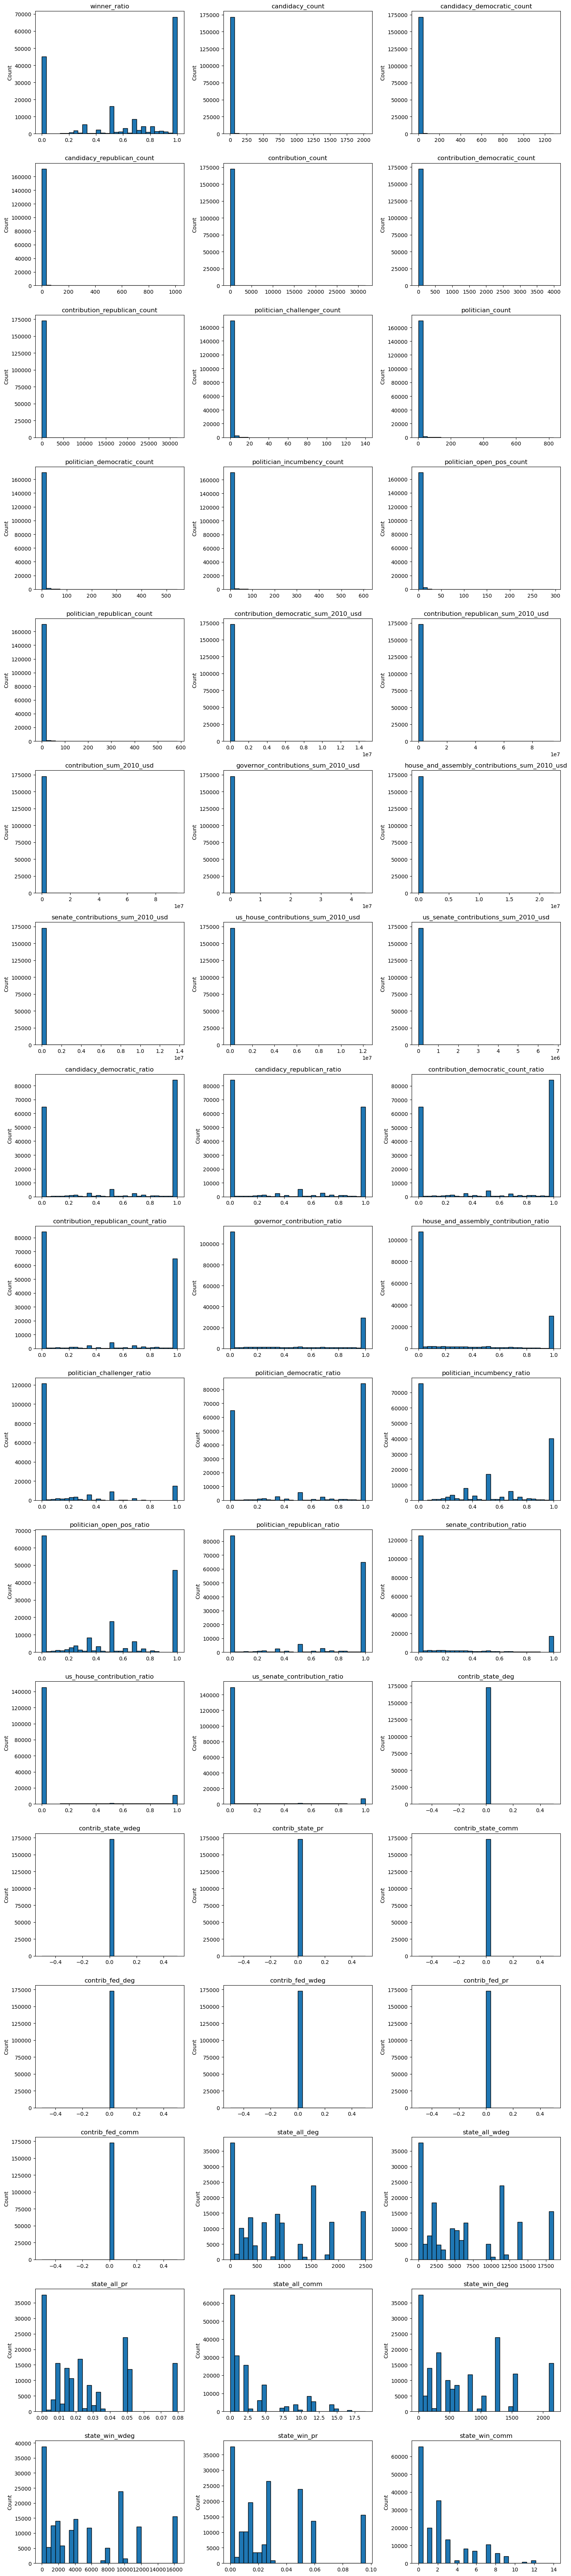

In [199]:
import matplotlib.pyplot as plt

def plot_histograms(df, num_vars, bins=30, cols=3, figsize=(15, 4)):
    n = len(num_vars)
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, num_vars):
        ax.hist(df[col].dropna(), bins=bins, edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
    
    # remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()

plot_histograms(train, num_vars)


In [200]:
from skimpy import skim
pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',800)

In [201]:
skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 172848 │ │ float64     │ 40    │                                                          │
│ │ Number of columns │ 57     │ │ int64       │ 12    │                                                          │
│ └───────────────────┴────────┘ │ string      │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column             ┃ NA ┃ NA % ┃ mean    ┃ sd      ┃ p0 ┃ p25      ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ zip_code           │  0 │    0 │   37970 │   29040 │  0 │    14220 │   29480 │   60640 │   100000 │ ▆█▂▂▃▃ │  │
│ │ winner_ratio       │  0 │    0 │   0.594 │  0.4107 │  0 │        0 │  0.6667 │       1 │        1 │ ▅▁ ▂▂█ │  │
│ │ candidacy_count    │  0 │    0 │   6.056 │   25.56 │  2 │        2 │       2 │       4 │     2026 │   █    │  │
│ │ candidacy_democrat │  0 │    0 │   3.271 │   14.02 │  0 │        0 │       2 │       3 │     1284 │   █    │  │
│ │ ic_count           │    │      │         │         │    │          │         │         │          │        │  │
│ │ candidacy_republic │  0 │    0 │   2.785 │    14.8 │  0 │        0 │       1 │       2 │     1014 │   █    │  │
│ │ an_count           │    │      │         │         │    │          │         │         │          │        │  │
│ │ contribution_count │  0 │    0 │   9.664 │   92.53 │  2 │        2 │       3 │       7 │    31650 │   █    │  │
│ │ contribution_democ │  0 │    0 │   5.335 │   30.95 │  0 │        0 │       2 │       4 │     3990 │   █    │  │
│ │ ratic_count        │    │      │         │         │    │          │         │         │          │        │  │
│ │ contribution_repub │  0 │    0 │   4.329 │    81.5 │  0 │        0 │       1 │       3 │    31650 │   █    │  │
│ │ lican_count        │    │      │         │         │    │          │         │         │          │        │  │
│ │ politician_challen │  0 │    0 │  0.7036 │   2.002 │  0 │        0 │       0 │       1 │      140 │   █    │  │
│ │ ger_count          │    │      │         │         │    │          │         │         │          │        │  │
│ │ politician_count   │  0 │    0 │   5.038 │   15.14 │  2 │        2 │       2 │       4 │      829 │   █    │  │
│ │ politician_democra │  0 │    0 │   2.743 │   8.458 │  0 │        0 │       2 │       2 │      543 │   █    │  │
│ │ tic_count          │    │      │         │         │    │          │         │         │          │        │  │
│ │ politician_incumbe │  0 │    0 │   2.456 │   11.11 │  0 │        0 │       1 │       2 │      608 │   █    │  │
│ │ ncy_count          │    │      │         │         │    │          │         │         │          │        │  │
│ │ politician_open_po │  0 │    0 │   1.794 │   4.161 │  0 │        0 │       1 │       2 │      296 │   █    │  │
│ │ s_count            │    │      │         │         │    │          │         │         │          │        │  │
│ │ politician_republi │  0 │    0 │   2.295 │   9.108 │

In [202]:
# 1. Check how many duplicate rows exist
num_duplicates = train.duplicated().sum()
print(f"🔍 Number of duplicate rows: {num_duplicates}")

# 2. Optionally, view the duplicates
duplicates = train[train.duplicated()]
print("🔁 Duplicate rows (if any):")
print(duplicates.head())  # adjust .head() as needed

# 3. If you want to drop them:
train = train.drop_duplicates()
print(f"✅ Duplicates removed. New shape: {train.shape}")


🔍 Number of duplicate rows: 2417
🔁 Duplicate rows (if any):
     general_sector         city  zip_code specific_sector state  \
5155        Uncoded    ENGLEWOOD    7631.0         Uncoded    NJ   
5156        Uncoded     PEMBROKE   28372.0         Uncoded    NC   
6506        Uncoded     FRANKLIN    7416.0         Uncoded    NJ   
6523        Uncoded       LEONIA    7605.0         Uncoded    NJ   
6820        Uncoded  ALBUQUERQUE   87110.0         Uncoded    NM   

     contributor_type  winner_ratio  candidacy_count  \
5155       Individual           1.0                3   
5156       Individual           1.0                2   
6506       Individual           1.0                2   
6523       Individual           1.0                3   
6820       Individual           1.0                2   

      candidacy_democratic_count  candidacy_republican_count  \
5155                           3                           0   
5156                           2                           0   
65

In [204]:
from scipy.stats import skew, kurtosis

# ------------------------------------------------------------------
# 2 · Compute skewness and (excess) kurtosis
# ------------------------------------------------------------------
stats = pd.DataFrame(index=num_vars, columns=["skew", "kurtosis"])

for col in num_vars:
    stats.loc[col, "skew"]     = skew(train[col].dropna())          # Fisher‐Pearson
    stats.loc[col, "kurtosis"] = kurtosis(train[col].dropna())      # excess kurtosis (0 = normal tail)

stats = stats.astype(float)

# ------------------------------------------------------------------
# 3 · Flag problematic variables
# ------------------------------------------------------------------
stats["|skew|>1"]   = stats["skew"].abs() > 1
stats["kurt>3"]     = stats["kurtosis"]  > 3

# sort by absolute skew so big offenders float to the top
stats_sorted = stats.reindex(stats["skew"].abs().sort_values(ascending=False).index)

# ------------------------------------------------------------------
# 4 · Show a concise table
# ------------------------------------------------------------------
pd.set_option("display.float_format", "{:,.3f}".format)   # tidy printing
display(stats_sorted.head(25))   # top 25 most‑skewed — adjust as needed


,skew,kurtosis,|skew|>1,kurt>3
contribution_republican_count,338.338,"129,705.180",True,True
governor_contributions_sum_2010_usd,331.451,"121,902.707",True,True
contribution_republican_sum_2010_usd,306.665,"104,259.740",True,True
contribution_sum_2010_usd,257.742,"81,405.826",True,True
contribution_count,237.277,"78,294.753",True,True
senate_contributions_sum_2010_usd,225.814,"61,782.461",True,True
house_and_assembly_contributions_sum_2010_usd,214.976,"51,088.230",True,True
us_senate_contributions_sum_2010_usd,157.389,"33,014.224",True,True
contribution_democratic_sum_2010_usd,98.328,"13,154.039",True,True
us_house_contributions_sum_2010_usd,79.699,"9,329.690",True,True


In [205]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize

# ------------------------------------------------------------
# 0.  Lists from above skew table
# ------------------------------------------------------------
money_like = [
    'contribution_republican_sum_2010_usd','governor_contributions_sum_2010_usd',
    'contribution_republican_sum_2010_usd','contribution_sum_2010_usd',
    'senate_contributions_sum_2010_usd','house_and_assembly_contributions_sum_2010_usd',
    'us_senate_contributions_sum_2010_usd','contribution_democratic_sum_2010_usd',
    'us_house_contributions_sum_2010_usd'
]

count_like = [
    'contribution_republican_count','contribution_count',
    'contribution_democratic_count','candidacy_democratic_count',
    'candidacy_republican_count','candidacy_count',
    'politician_open_pos_count','politician_republican_count',
    'politician_incumbency_count','politician_democratic_count',
    'politician_count','politician_challenger_count'
]

ratio_like = [
    'us_senate_contribution_ratio','us_house_contribution_ratio',
    'politician_challenger_ratio','senate_contribution_ratio','state_all_comm'
]

# ------------------------------------------------------------
# 1.  log1p transform for money & count cols
# ------------------------------------------------------------
for col in money_like + count_like:
    if col in train.columns:           # guard against typos / dropped cols
        train[col] = np.log1p(train[col].clip(lower=0))
        # test[col]  = np.log1p(test[col].clip(lower=0))

# ------------------------------------------------------------
# 2.  Yeo‑Johnson power transform for skewed ratios
# ------------------------------------------------------------
pt = PowerTransformer(method="yeo-johnson", standardize=False)
train[ratio_like] = pt.fit_transform(train[ratio_like])
# test[ratio_like]  = pt.transform(test[ratio_like])

# ------------------------------------------------------------
# 3.  Winsorise: clip any extreme 1 % tails on ALL numeric cols
# ------------------------------------------------------------
numeric_cols = train.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    lo, hi = np.percentile(train[col], [1, 99])
    train[col] = train[col].clip(lo, hi)
    # test[col]  = test[col].clip(lo, hi)

print("✅  Skew & kurtosis treatments applied.")


✅  Skew & kurtosis treatments applied.


In [206]:
from scipy.stats import skew, kurtosis

# ------------------------------------------------------------------
# 2 · Compute skewness and (excess) kurtosis
# ------------------------------------------------------------------
stats = pd.DataFrame(index=num_vars, columns=["skew", "kurtosis"])

for col in num_vars:
    stats.loc[col, "skew"]     = skew(train[col].dropna())          # Fisher‐Pearson
    stats.loc[col, "kurtosis"] = kurtosis(train[col].dropna())      # excess kurtosis (0 = normal tail)

stats = stats.astype(float)

# ------------------------------------------------------------------
# 3 · Flag problematic variables
# ------------------------------------------------------------------
stats["|skew|>1"]   = stats["skew"].abs() > 1
stats["kurt>3"]     = stats["kurtosis"]  > 3

# sort by absolute skew so big offenders float to the top
stats_sorted = stats.reindex(stats["skew"].abs().sort_values(ascending=False).index)

# ------------------------------------------------------------------
# 4 · Show a concise table
# ------------------------------------------------------------------
pd.set_option("display.float_format", "{:,.3f}".format)   # tidy printing
display(stats_sorted.head(25))   # top 25 most‑skewed — adjust as needed


,skew,kurtosis,|skew|>1,kurt>3
us_senate_contributions_sum_2010_usd,2.310,3.666,True,True
us_senate_contribution_ratio,2.143,2.635,True,False
politician_count,2.067,4.396,True,True
us_house_contributions_sum_2010_usd,2.065,2.615,True,False
candidacy_count,1.953,3.878,True,True
us_house_contribution_ratio,1.864,1.503,True,False
contribution_count,1.514,2.077,True,False
politician_challenger_count,1.372,0.743,True,False
state_win_comm,1.251,0.594,True,False
senate_contributions_sum_2010_usd,1.185,-0.294,True,False


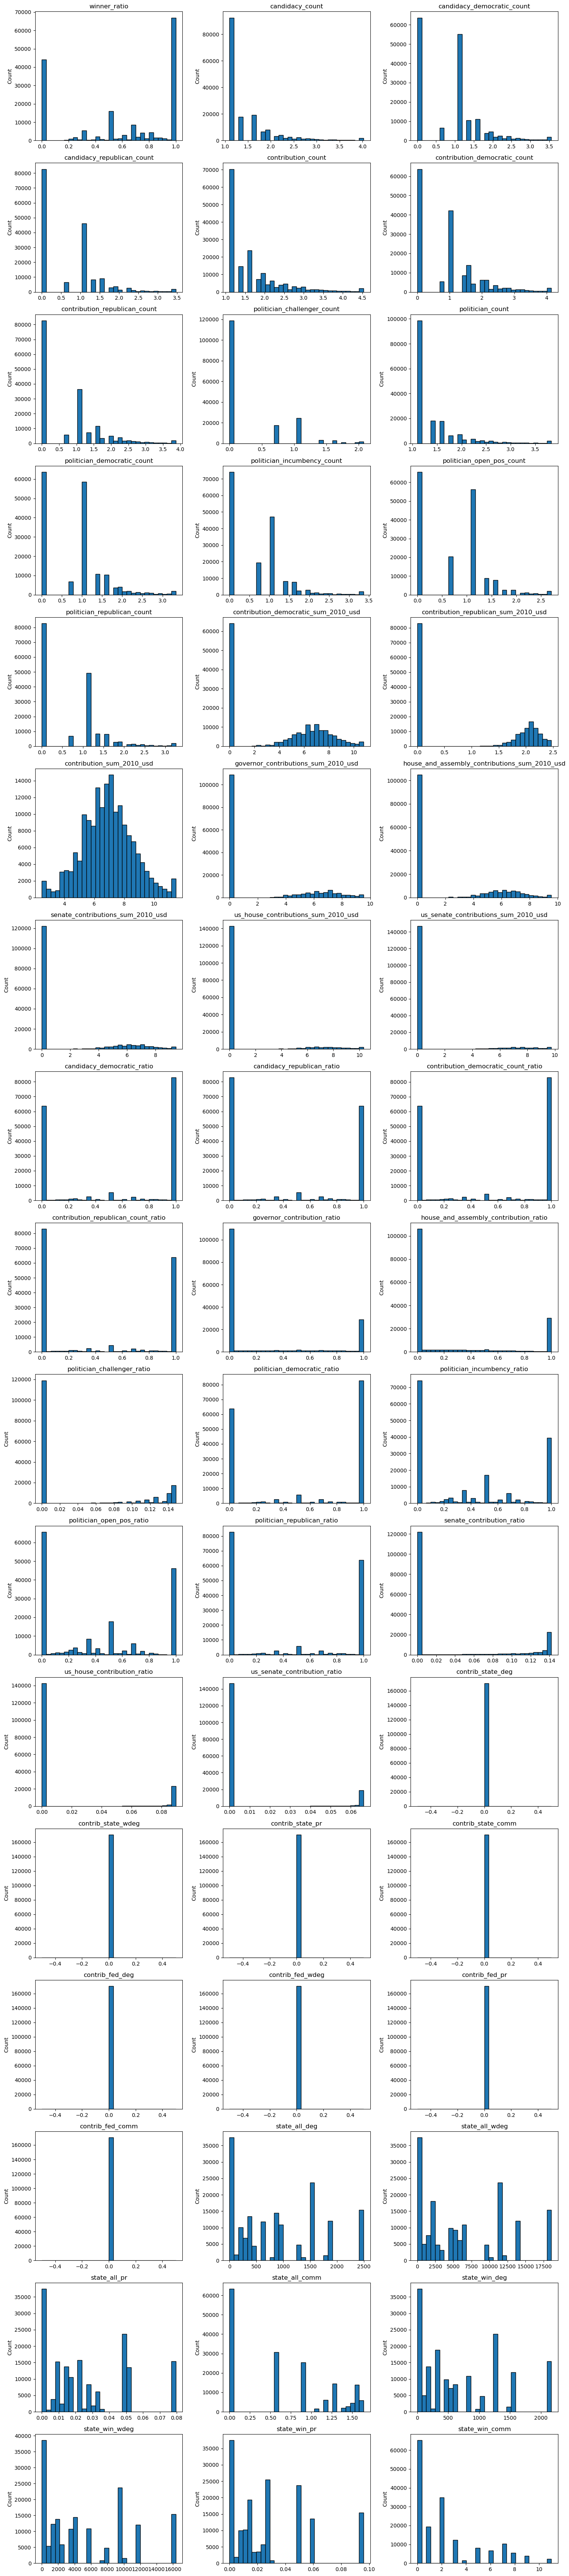

In [207]:
import matplotlib.pyplot as plt

def plot_histograms(df, num_vars, bins=30, cols=3, figsize=(15, 4)):
    n = len(num_vars)
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows))
    axes = axes.flatten()
    
    for ax, col in zip(axes, num_vars):
        ax.hist(df[col].dropna(), bins=bins, edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
    
    # remove any unused subplots
    for ax in axes[n:]:
        fig.delaxes(ax)
    
    plt.tight_layout()
    plt.show()

plot_histograms(train, num_vars)


In [203]:
train[cat_vars].describe()

,zip_code
count,170431.000000
mean,38173.100064
std,29014.375320
min,0.000000
25%,14626.000000
50%,30031.000000
75%,61081.000000
max,99999.000000


In [165]:
for col in cat_vars:
    print(train[col].value_counts())
    print("#########")

general_sector
Uncoded                                            41916
Lawyers & Lobbyists                                29416
Retired                                            21525
Health Professionals                                8026
No Employer Listed or Found                         7976
Real Estate                                         7240
Education                                           4880
Civil Servants/Public Officials                     3085
Insurance                                           2863
Securities & Investment                             2447
Homemakers/Non-income earners                       2135
Candidate Contributions                             1930
General Contractors                                 1894
Construction Services                               1554
Hospitals & Nursing Homes                           1489
Commercial Banks                                    1457
Business Services                                   1434
Candidate Commit

In [166]:


# ------------------------------------------------------------------
#  CLIP & LOG‑TRANSFORM HEAVY‑TAILED $ FIELDS
# ------------------------------------------------------------------
# (ensure non‑negative first – you already fixed negatives earlier)
money_cols = [c for c in train.columns if c.endswith("_usd")]

for c in money_cols:
    train[c] = np.log1p(train[c].clip(lower=0))


In [167]:
import numpy as np
import pandas as pd
from category_encoders import TargetEncoder

# ------------------------------------------------------------------
# 1.  PARAMETERS
# ------------------------------------------------------------------
TOP_GENERAL   = 25
TOP_SPECIFIC  = 100
STATE_MIN     = 200          # states with <200 rows → OTHER
TE_SMOOTHING  = 10           # strength of shrinkage in TargetEncoder

cat_top_lump  = {
    "general_sector"  : (TOP_GENERAL,  "Other_Sector"),
    "specific_sector" : (TOP_SPECIFIC, "Other_Specific"),
}

# ------------------------------------------------------------------
# 2.  HELPER FUNCTIONS
# ------------------------------------------------------------------
def lump_by_top(df, col, top_n, new_label):
    top_vals = df[col].value_counts().nlargest(top_n).index
    df[col]  = df[col].where(df[col].isin(top_vals), new_label)
    return df

def lump_by_min(df, col, min_cnt, new_label):
    small = df[col].value_counts()[lambda s: s < min_cnt].index
    df[col] = df[col].where(~df[col].isin(small), new_label)
    return df

# ------------------------------------------------------------------
# 3.  APPLY LUMPING (***train and test***)
# ------------------------------------------------------------------
for col, (top_n, label) in cat_top_lump.items():
    train = lump_by_top(train, col, top_n, label)
    # test  = lump_by_top(test,  col, top_n, label)   # ★ keep mapping identical

train = lump_by_min(train, "state", STATE_MIN, "OTHER")
# test  = lump_by_min(test,  "state", STATE_MIN, "OTHER")

# ------------------------------------------------------------------
# 4.  TARGET ENCODING  (***fit on train, transform test***)
# ------------------------------------------------------------------
te_cols = ["general_sector", "specific_sector", "state"]
te      = TargetEncoder(cols=te_cols, smoothing=TE_SMOOTHING)

train[te_cols] = te.fit_transform(train[te_cols], train["winner_ratio"])
# test[te_cols]  = te.transform(test[te_cols])            # ★ no fit here

# ------------------------------------------------------------------
# 5  FREQUENCY‑ENCODE city and zip_code  (train‑fit, test‑transform)
# ------------------------------------------------------------------
for col in ["city", "zip_code"]:
    freq = (train[col].astype(str)      # ensure consistent dtype
                    .value_counts(normalize=True))   # share of total rows

    train[f"{col}_freq"] = train[col].astype(str).map(freq).fillna(0)
    # test[f"{col}_freq"]  = test[col].astype(str).map(freq).fillna(0)

# drop the raw string columns (high cardinality)
train.drop(columns=["city", "zip_code"], inplace=True)
# test.drop(columns=["city",  "zip_code"], inplace=True)


# ------------------------------------------------------------------
# 6.  HANDLE THE REMAINING SMALL CATEGORICALS WITH ONE‑HOT
# ------------------------------------------------------------------
cat_small = ["contributor_type"]      # only 3 levels
train = pd.get_dummies(train, columns=cat_small, drop_first=True)
# test  = pd.get_dummies(test,  columns=cat_small, drop_first=True)

# Keep column order identical in train & test after one‑hot:
# missing_cols = [c for c in train.columns if c not in test.columns]
# for c in missing_cols:
#     test[c] = 0
# test = test[train.columns.drop("winner_ratio")]         # align

print("✅  Pre‑processing finished. Shapes:", train.shape)
# print("✅  Pre‑processing finished. Shapes:",   test.shape)
   


✅  Pre‑processing finished. Shapes: (170431, 58)


In [180]:
for col in ["city", "zip_code","contributor_type"]:
    if col in cat_vars:
        cat_vars.remove(col)


In [181]:
cat_vars

['general_sector', 'specific_sector', 'state']

In [182]:
cat_vars

['general_sector', 'specific_sector', 'state']

In [183]:
train.columns

Index(['general_sector', 'specific_sector', 'state', 'winner_ratio',
       'candidacy_count', 'candidacy_democratic_count',
       'candidacy_republican_count', 'contribution_count',
       'contribution_democratic_count', 'contribution_republican_count',
       'politician_challenger_count', 'politician_count',
       'politician_democratic_count', 'politician_incumbency_count',
       'politician_open_pos_count', 'politician_republican_count',
       'contribution_democratic_sum_2010_usd',
       'contribution_republican_sum_2010_usd', 'contribution_sum_2010_usd',
       'governor_contributions_sum_2010_usd',
       'house_and_assembly_contributions_sum_2010_usd',
       'senate_contributions_sum_2010_usd',
       'us_house_contributions_sum_2010_usd',
       'us_senate_contributions_sum_2010_usd', 'candidacy_democratic_ratio',
       'candidacy_republican_ratio', 'contribution_democratic_count_ratio',
       'contribution_republican_count_ratio', 'governor_contribution_ratio',
    

In [184]:
for col in cat_vars:
    print(train[col].value_counts())
    print("#########")

general_sector
0.554041    41916
0.602974    29416
0.558129    21525
0.664147    20402
0.619791     8026
0.624253     7976
0.614648     7240
0.516620     4880
0.607878     3085
0.665205     2863
0.625238     2447
0.541885     2135
0.467179     1930
0.649326     1894
0.622656     1554
0.683258     1489
0.642347     1457
0.595600     1434
0.630844     1339
0.588926     1150
0.686802     1149
0.572157     1098
0.529244     1070
0.637109      992
0.688297      991
0.668889      973
Name: count, dtype: int64
#########
specific_sector
0.554041    41916
0.592262    26680
0.558129    21525
0.667235    12640
0.624253     7976
0.613234     3917
0.609821     3552
0.707021     2725
0.617217     2576
0.606914     2490
0.516992     2350
0.624505     2218
0.541885     2135
0.651481     1462
0.642347     1457
0.517960     1366
0.472515     1363
0.630844     1339
0.667621     1168
0.588926     1150
0.670808     1104
0.629943     1070
0.654479      918
0.547157      901
0.597810      879
0.623174      7

In [ ]:
# ------------------------------------------
# 0.  PREP
# ------------------------------------------
import numpy as np, pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# X  : all engineered features (numeric dataframe)
# y  : target
X = train.drop(columns=["winner_ratio"])
y = train["winner_ratio"].values.astype("float32")

# ------------------------------------------
# 1.  STANDARDISE  (fit only on train folds)
# ------------------------------------------
scaler = StandardScaler()

# ------------------------------------------
# 2.  MODEL BUILDER
# ------------------------------------------
def make_model(input_dim, hidden=[256,128,64], drop=0.20):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    for h in hidden:
        model.add(layers.Dense(h, activation="relu"))
        model.add(layers.Dropout(drop))
    model.add(layers.Dense(1, activation="sigmoid"))       # ⬅️ ensures 0‑1
    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="mse",                                        # Kaggle metric
        metrics=[],
    )
    return model

# ------------------------------------------
# 3.  K‑FOLD TRAINING
# ------------------------------------------
N_SPLITS = 5
BATCH    = 1024
EPOCHS   = 300

kf   = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
oof  = np.zeros(len(X))
pred = np.zeros(len(test))          # will accumulate test predictions

for fold, (tr_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\n📂 Fold {fold}")

    # 3‑a  fit scaler on *training* rows only
    X_tr = scaler.fit_transform(X.iloc[tr_idx])
    X_va = scaler.transform(X.iloc[val_idx])

    # 3‑b  build / train
    net = make_model(X_tr.shape[1])
    es  = keras.callbacks.EarlyStopping(
            patience=20, restore_best_weights=True, verbose=0)
    net.fit(X_tr, y[tr_idx],
            validation_data=(X_va, y[val_idx]),
            epochs=EPOCHS, batch_size=BATCH,
            callbacks=[es], verbose=0)

    # 3‑c  out‑of‑fold preds & score
    oof[val_idx] = net.predict(X_va, batch_size=BATCH).squeeze()
    mse = mean_squared_error(y[val_idx], oof[val_idx])
    print(f"   fold {fold} MSE = {mse:.6f}")

    # 3‑d  test predictions (scale test once per fold)
    X_test_scaled = scaler.transform(test[X.columns])
    pred += net.predict(X_test_scaled, batch_size=BATCH).squeeze() / N_SPLITS

print("\n📈 CV  MSE  =", mean_squared_error(y, oof))

# ------------------------------------------
# 4.  SUBMISSION
# ------------------------------------------
sub = pd.DataFrame({"index": test.index, "winner_ratio": pred.clip(0,1)})
sub.to_csv("nn_sigmoid_submission.csv", index=False)
print("Submission saved: nn_sigmoid_submission.csv")


In [ ]:
# # Try a gradient‑boosting model built for categorical + numerical**<br> CatBoost 
# # (or LightGBM w/ categorical) usually wins on these “messy mix” tables. 
# # | Handles remaining categories natively, robust to skew, requires little tuning. 

# from catboost import CatBoostRegressor, Pool

# cat_cols = ["contributor_type"]           # now the only remaining string col
# train_pool = Pool(data=train.drop("winner_ratio", axis=1),
#                   label=train["winner_ratio"],
#                   cat_features=[train.columns.get_loc(c) for c in cat_cols])
# model = CatBoostRegressor(
#         depth=6, learning_rate=0.05, iterations=3000,
#         loss_function="RMSE", eval_metric="RMSE",
#         early_stopping_rounds=200, verbose=200)
# model.fit(train_pool, eval_set=train_pool)   # quick CV → use KFold for final